In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2019
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Features & Evaluation"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, XX.X.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung



## Feature Engineering

<div class="task_description">
    <i class="task">Task 7.1:</i> <br>
</div>

Die SCHUFA berechnet für jede Person die Wahrscheinlichkeit, dass diese Person Ihren Zahlungsverpflichtungen künftig nachkommt. Was glauben Sie, welche Features werden dafür verwendet. Erstellen Sie eine Liste mit möglichen Features. Beschreiben Sie dabei, wie das Feature erhoben/gemessen wird und benennen Sie den Typ der Werte (binär, nominal, ordinal, numerisch).

*The SCHUFA calculates for each person the probability that this person will meet your payment obligations in the future. Which features do you think will be used for this? Create a list of possible features. Describe how the feature is collected/measured and name the type of values (binary, nominal, ordinal, numeric).*

<strong style="color: blue">Lösung:</strong>

Beispielsweise:

* Alter (Geburtsdatum): numerisch
* Geschlecht (Name?): binär/nominal
* Anzahl Konten (Bankabfrage): numerisch
* Anzahl Mahnungen im letzten Jahr (?),
* Wohnort (PLZ): nominal (Achtung, PLZ ist nicht "echt"numerisch, nur 5stellige Zahlen)
* Kreditkartenschulden (Bankabfrage): numerisch
* ...

Es ist nicht genau bekannt, auf welche Daten die Schufa zurückgreift.

* *Age (date of birth): numeric*
* *Sex (name?): binary/nominal*
* *Number of accounts (bank query): numeric*
* *Number of reminders in the last year (?)*
* *Place of residence (PLZ): nominal (Attention, PLZ is not "real" numeric, only 5-digit numbers)*
* *Credit card debt (bank query): numeric*
* ...

*It is not known exactly which data the Schufa uses.*

<div class="task_description">
    <i class="task">Task 7.2:</i> <br>
</div>

Sie werden von einem Unternehmen beauftragt ein System zur automatischen Klassifikation von Computerspielen in Alterskategorien zu entwerfen.
Die Liste der Kategorien ist ‘0’, ‘6’, ‘12’ und ‘18’.
Dies entspricht jeweils dem Mindestalter um das Spiel spielen zu dürfen.
Zu jedem Spiel gibt es folgende Meta-Informationen, die für die Klassifikation benutzt werden können:<br>
*You are commissioned by a company to design a system for the automatic classification of computer games into age categories.
The list of categories is '0', '6', '12' and '18'.
This is the minimum age to play the game.
For each game there is the following meta information, which can be used for classification:*
* der Name des Spiels (*the name of the game,*),
* der Name der Entwicklerfirma (*the name of the developer company,*),
* einen Text, welcher den Inhalt des Spieles beschreibt (*a text describing the content of the game*).

a) Definieren Sie vier Features, welche Sie für die Klassifikation benutzen können. Erklären Sie warum diese hilfreich sein könnten.<br>
*Define four features that you can use for classification. Explain why they might be helpful*

<strong style="color: blue">Lösung:</strong>
Häufigkeitsverteilung der Wörter, Name des Spieles, Name der Entwicklerfirma, enthält spezielle Wörter (z.B.
Sex, Mord, . . . )<br>
*Frequency distribution of words, name of game, name of developer company, contains special words (e.g.
Sex, murder, . . . )*

b) Wie würden Sie die Daten unterteilen, wenn Sie den bestmöglichen Klassifikator trainieren wollen, aber gleichzeitig prüfen möchten, ob dieser auch wirklich der beste ist? Begründen Sie Ihre Aufteilung. <br>
*How would you divide the data if you wanted to train the best possible classifier, but at the same time want to check if it is really the best one? Justify your division.*

<strong style="color: blue">Lösung:</strong>
Randomisierte Aufteilung in Trainingset und Testset (im Verhältnis 9:1 oder 8:2). Cross-validation oder Leave-one-out auf dem Trainingset und finaler Test auf dem Testset. <br>
*Randomized division into training set and test set (ratio 9:1 or 8:2). Cross-validation or Leave-one-out on the training set and final test on the test set*

c) Zusätzlich zu den bereits vorliegenden Meta-Daten erhalten Sie die Möglichkeit beliebige weitere Informationen über das Spiel anzufordern, die üblicherweise bekannt sind (mit Ausnahme der Alterseinstufung selbst). Nennen Sie drei zusätzliche Features, welche vermutlich die Klassifikationsgenauigkeit erhöhen werden. Erklären Sie kurz warum Sie denken, dass diese Features hilfreich sein werden.<br>
*In addition to the existing metadata, you will be given the opportunity to request any other information about the Game that is commonly known (other than the age rating itself). Name three additional features that are likely to increase classification accuracy. Explain briefly why you think these features will be helpful.*

<strong style="color: blue">Lösung:</strong>

Spielzeit: Kinderspiele eher kurz. Erwachsenenspiele eher lang.
* Genre: Shooter oft FSK 18, Jump n’ run eher selten.
* Bekannte Figuren: Kinderspiele enthalten oft bekannte sich wiederholende Figuren die sich gut einprägen
und meistens eine Maskottchen funktion erfüllen.
* Name des Chefentwicklers: In der Spieleindustrie arbeitet ein bestimmter Chefentwickler oft an spielen
die sich sehr ähnlich oder sogar Nachfolger sind.

*Play time: Children's games rather short. Adult games rather long.*
* *Genre: Shooter often FSK 18, Jump n' run rather rare.*
* *Known characters: Children's games often contain well-known repetitive characters that are easy to remember and usually perform a mascot function.*
* *Name of the chief developer: In the games industry, a certain chief developer often works on games that are very similar or even successors.*

## Feature Selection

Selecting features using all data before splitting into folds for training/testing is a big source of train-test leakage. Performance on random data much better than random performance due to the leakage.

In [143]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# random data:
X = np.random.randn(500, 10000)
y = np.random.choice(2, size=500)

selector = SelectKBest(k=25)
# first select features
X_selected = selector.fit_transform(X,y)
# then split
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# fit a simple logistic regression
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_selected_train,y_train)

# predict on the test set and get the test accuracy:
y_pred = lr.predict(X_selected_test)
accuracy_score(y_test, y_pred)

0.712

Now try on new data:

In [144]:
X_new = np.random.randn(500, 10000)
y_new = np.random.choice(2, size=500)

# select the same features in the new data
X_new_selected = selector.transform(X_new)
# predict and get the accuracy:
y_new_pred = lr.predict(X_new_selected)
accuracy_score(y_new, y_new_pred)

0.482

How to do it right:

In [145]:
# split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# then select features using the training set only
selector = SelectKBest(k=25)
X_train_selected = selector.fit_transform(X_train,y_train)

# fit again a simple logistic regression
lr.fit(X_train_selected,y_train)

# select the same features on the test set, predict, and get the test accuracy:
X_test_selected = selector.transform(X_test)
y_pred = lr.predict(X_test_selected)
accuracy_score(y_test, y_pred)

0.456

## Linear Regression

<div class="task_description">
    <i class="task">Task 7.4:</i> <br>
</div>

Untenstehend finden Sie Python-Code, der Daten einliest und dann einen Linear Regression Classifier anwendet. 
*Below you will find Python code that reads data and then applies a Linear Regression Classifier.*

a) Schauen Sie sich zunächst mal den Code an und analysieren Sie was passiert. <br>
*First take a look at the code and analyze what happens.*

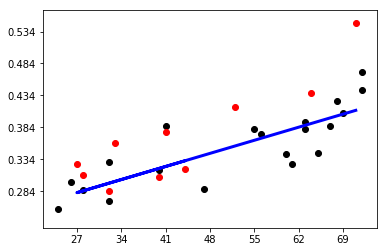

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Format [°C, Consumption]
train = [
    [41,0.386],
    [56,0.374],
    [63,0.393],
    [68,0.425],
    [69,0.406],
    [65,0.344],
    [61,0.327],
    [47,0.288],
    [32,0.269],
    [24,0.256],
    [28,0.286],
    [26,0.298],
    [32,0.329],
    [40,0.318],
    [55,0.381],
    [63,0.381],
    [72,0.470],
    [72,0.443],
    [67,0.386],
    [60,0.342]]

test = [
    [44,0.319],
    [40,0.307],
    [32,0.284],
    [27,0.326],
    [28,0.309],
    [33,0.359],
    [41,0.376],
    [52,0.416],
    [64,0.437],
    [71,0.548]]

#Read train
trainX, trainY = zip(*train)
trainX = np.array(trainX).reshape(-1,1)

#Read test
testX, testY = zip(*test)
testX = np.array(testX).reshape(-1,1)


regr = LinearRegression().fit(trainX, trainY)

testY_pred = regr.predict(testX)

# Plot outputs
plt.scatter(trainX, trainY,  color='black')
plt.scatter(testX, testY,  color='red')
plt.plot(testX, testY_pred, color='blue', linewidth=3)


plt.yticks(np.arange(min(testY), max(testY), 0.05))
plt.xticks(np.arange(min(testX), max(testX), 7))

plt.show()

b) Versuchen Sie das Format der Trainingsdaten zu verstehen: welche Information wird hier codiert? <br>
*Try to understand the format of the training data: what information is coded here?*

<strong style="color: blue">Lösung:</strong>

Icecream data: Ein Feature Temperature in Fahrenheit und eine Klasse Ice Cream Consumption in Pints pro Kopf
(beide numerisch).

c) Lassen Sie den Classifier laufen und schauen Sie sich das Ergebnis an. Wie lautet die Regressionsgleichung?
Welche Werte wurden für die Variablen w (Gewicht) und b (Bias) gelernt? <br>
*Run the classifier and take a look at the result. What is the regression equation?
What values were learned for the variables w (weight) and b (bias)?*

<strong style="color: blue">Lösung:</strong>

Regressionsgleichung: Consumption = 0.0029 * Temperature + 0.2026.

In [114]:
print("Consumption = w * Temperature + b")
print("Consumption =",regr.coef_[0],"* Temperature +", regr.intercept_)

Consumption = w * Temperature + b
Consumption = 0.0029295142080178905 * Temperature + 0.2026187854726688


d) Am Samstag wird eine Temperatur von 71 Grad Fahrenheit erwartet. Was sagt unser Modell voraus? Wie viel
Eiscreme wird am Samstag verkauft werden? <br>
*On Saturday a temperature of 71 degrees Fahrenheit is expected. What does our model predict? How much
Ice cream will be sold on Saturday?*

<strong style="color: blue">Lösung:</strong>

Variable w: [0.0029], Gewichtsvektor mit nur einem Eintrag, da wir nur ein Feature haben (!), Variable b: 0.2026.
Consumption = 0.0029 * 71 + 0.2026 = 0.409

In [118]:
# automatic
print(regr.predict(np.array([[71]])))

# manual
print(regr.coef_*71 + regr.intercept_)

[0.41061429]
[0.41061429]


e) Checken Sie nun in den Testdaten, wie viel Eiscreme an einem Tag mit 71 Grad
Fahrenheit tatsächlich konsumiert wurde. Hat unser Modell den Konsum unter- oder überschätzt? <br>
*Now check the test data to see how much ice cream is needed on a day with 71 degrees Celsius.
Fahrenheit was actually consumed. Did our model underestimate or overestimate consumption?*

<strong style="color: blue">Lösung:</strong>

0.548, unterschätzt

## Information Gain

<div class="task_description">
    <i class="task">Task 7.5:</i> <br>
</div>

Sie verfügen über die folgenden (fiktiven) Patientendaten und die dazugehörigen Diagnosen.
*You have the following (fictitious) patient data and the corresponding diagnoses.*

| Patient | Fieber | Übergeben | Durchfall | Zittern | Diagnose                  |
|---------|--------|-----------|-----------|---------|---------------------------|
| 1       | nein   | nein      | nein      | nein    | gesund (g)                |
| 2       | leicht | nein      | nein      | nein    | Grippe (G)                |
| 3       | hoch   | nein      | nein      | ja      | Grippe (G)                |
| 4       | hoch   | ja        | ja        | nein    | Salmonellenvergiftung (S) |
| 5       | leicht | nein      | ja        | nein    | Salmonellenvergiftung (S) |
| 6       | nein   | ja        | ja        | nein    | Darmentzündung (D)        |
| 7       | leicht | ja        | ja        | nein    | Darmentzündung (D)        |

Nach welchem Symptom sollten Sie einen Patienten als erstes fragen? Berechnen Sie den Information Gain (Informationsgewinn) für jedes Feature. <br>
*What symptom should you ask a patient about first? Calculate the Information Gain for each feature.*

<strong style="color: blue">Lösung:</strong>

Beispielrechnung für den ersten (Root) Knoten.
* Entropie des gegebenen Datensatzes S:
$ Entropy(S) = -\frac{1}{7}log_2(\frac{1}{7})-\frac{2}{7}log_2(\frac{2}{7})-\frac{2}{7}log_2(\frac{2}{7})-\frac{2}{7}log_2(\frac{2}{7})$
* Betrachte Attribut x = "Fieber"

| Values     | g      | G    | S   | D    | Entropy(Si)                 |
|------------|--------|------|-----|------|-----------------------------|
| S1(nein)   | *      | -    | -   | *    | [1/2, 0. 0, 1/2] –> 1       |
| S2(leicht) | -      | *    | *   | *    | [0, 1/3, 1/3, 1/3] –> 1.585 |
| S3(hoch)   | -      | *    | *   | -    | [0, 1/2, 1/2, 0] –> 1       |

$ Entropy(S|Fieber) = \frac{2}{7}*1+\frac{3}{7}*1.585+\frac{2}{7}*1 = 1.251$
<br>
* Betrachte Attribut x = "Übergeben"

| Values   | g      | G    | S   | D    | Entropy(Si)               |
|----------|--------|------|-----|------|---------------------------|
| S1(ja)   | -      |  -   | *   | **   | [0, 0, 1/3, 2/3] –> 0.918 |
| S2(nein) | *      | **   | *   |  -   | [1/4, 2/4, 1/4, 0] –> 1.5 |

$ Entropy(S|Übergeben) = \frac{3}{7}*0.918+\frac{4}{7}*1.5 = 1.251$
<br>

* Betrachte Attribut x = "Durchfall"

| Values   | g      | G    | S   | D    | Entropy(Si)               |
|----------|--------|------|-----|------|---------------------------|
| S1(ja)   | -      | -    | **  | **   | [0, 0, 2/4, 2/4] –> 1     |
| S2(nein) | *      | **   | -   | -    | [1/3, 2/3, 0, 0] –> 0.918 |

$ Entropy(S|Durchfall) = \frac{4}{7}*1+\frac{3}{7}*0.918 = 0.965$
<br>

* Betrachte Attribut x = "Zittern"

| Values   | g      | G    | S   | D    | Entropy(Si)                  |
|----------|--------|------|-----|------|------------------------------|
| S1(ja)   | -      | *    | -   | -    | [0, 0, 1, 0] –>0             |
| S2(nein) | *      | *    | **  | **   | [1/6, 2/6, 2/6, 2/6] –>1.918 |

$ Entropy(S|Zittern) = \frac{1}{7}*0+\frac{6}{7}*1.918 = 1.644$


Das Attribut, das den Informationsgewinn maximiert.
* Fieber: $Gain(S) = Ent(s) - Ent(S|Fieber) = 1.95 - 1.251 = 0.699$
* Erbrechen: $Gain(S) = Ent(s) - Ent(S|Erbrechen) = 1.95 - 1.251 = 0.699$
* Durchfall: $Gain(S) = Ent(s) - Ent(S|Durchfall) = 1.95 - 0.965 = 0.985$
* Zittern: $Gain(S) = Ent(s) - Ent(S|Zittern) = 1.95 - 1.251 = 0.306$ <br>
Attribut "Durchfall ist das effektivste; es maximiert den Informationsgewinn. <br>


## Evaluation

<div class="task_description">
    <i class="task">Task 7.6:</i> <br>
</div>

Welche der folgenden Aussagen hinsichtlich Konfusionsmatrizen sind wahr/falsch?
*Which of the following statements regarding confusion matrices are true or false?*

a) Die Einträge auf der Hauptdiagonale sind immer 1. <br>
*The entries on the main diagonal are always 1.*

<strong style="color: blue">Lösung:</strong>

Falsch, die Einträge auf der Hauptdiagonale repräsentieren die Anzahl der korrekt klassifzierten Instanzen.<br>
*Wrong, the entries on the main diagonal represent the number of correctly classified instances.*

b) Die Zelle (i , j) enthält die Anzahl wie oft die Klasse i falsch als j eingeordnet wurde (unter der Bedindung das i ̸= j).<br>
*The cell (i , j) contains the number of times the class i was wrongly classified as j (under the condition i ̸= j).*

<strong style="color: blue">Lösung:</strong>
Korrekt

c) Die Confusion-Matrix kann benutzt werden um Probleme beim Klassifizieren zu identifizieren.<br>
*The Confusion Matrix can be used to identify problems with classification.*

<strong style="color: blue">Lösung:</strong>

Korrekt. Wenn z.B. die Klasse i sehr häufig als Klasse j falsch klassifiziert wird, ist dies ein wichtiger Hinweis nach Features zu suchen, welche die Klassen i und j unterscheiden.<br>
*Correct. For example, if class i is very often misclassified as class j, this is an important hint to look for features that differentiate classes i and j.*

d) Die Confusion-Matrix kann benutzt werden um zwei verschiedene Klassifikatoren zu vergleichen.<br>
*The Confusion Matrix can be used to compare two different classifiers.*


<strong style="color: blue">Lösung:</strong>
Korrekt

e) The number of columns is always equal to the number of rows.<br>
*Die Anzahl der Spalten ist immer gleich der Anzahl der Zeilen.*

<strong style="color: blue">Lösung:</strong>
Korrekt

<div class="task_description">
    <i class="task">Task 7.7:</i> <br>
</div>

Das System aus Aufgabe 7.2. zur automatischen Klassifikation von Computerspielen in Alterskategorien wird in zwei Varianten entwickelt. Welche der beiden Varianten würden Sie empfehlen, wenn es die oberste Priorität ist Kinder vor Spielen zu schützen, die nicht altersgerecht sind? Erläutern Sie Ihre Entscheidung.<br>

*The system from Task 7.2. for the automatic classification of computer games into age categories is developed in two variants. Which of the two variants would you recommend if the top priority is to protect children from games that are not age-appropriate? Explain your decision.*

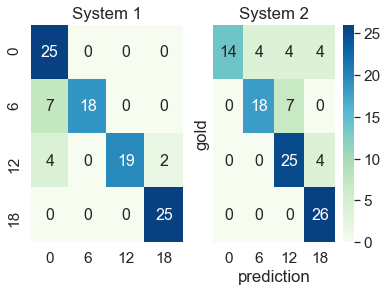

In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sys1 = [[25, 0, 0, 0],
        [ 7,18, 0, 0],
        [ 4, 0,19, 2],
        [ 0, 0, 0,25]]

sys2 = [[14, 4, 4, 4],
        [ 0,18, 7, 0],
        [ 0, 0,25, 4],
        [ 0, 0, 0,26]] 

labels = [0,6,12,18]

%matplotlib inline
fig, ax = plt.subplots(1,2, sharey='row')
sn.set(font_scale=1.4)#for label size
sn.heatmap(pd.DataFrame(sys1, range(4), range(4)), ax=ax[0], cmap="GnBu", xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 16}, cbar=False).set_title("System 1");
sn.heatmap(pd.DataFrame(sys2, range(4), range(4)), ax=ax[1], cmap="GnBu", xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 16}).set_title("System 2");
plt.xlabel('prediction');
plt.ylabel('gold');

<strong style="color: blue">Lösung:</strong> <br>

Klassifikator 2, da alle automatischen Einstufungen höher sind als die korrekte Einstufung. Es ist besser ein
Spiel zu hoch einzustufen, als andersherum. Also besser FSK12, wenn eigentlich FSK 6 auch angemessen
wäre, als FSK12, wenn eigentlich FSK18 hätte vergeben werden müssen.

<div class="task_description">
    <i class="task">Task 7.8:</i> <br>
</div>

Gegeben sei ein Klassifikator zur Erkennung von Spam-Emails.
Auf einem Testset von Emails zeigt er folgende Ergebnisse: <br>

*A classifier for the detection of spam emails is given. On a test set of emails it shows the following results:*

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | ok |  |
| 2 | ok | ok |  |
| 3 | spam | spam |  |
| 4 | spam | ok |  |
| 5 | ok | spam |  |
| 6 | ok | ok |  |

a) Berechnen Sie Accuracy, Precision(spam), Recall(spam), und $F_1$-measure. <br>
*Calculate Accuracy, Precision(spam), Recall(spam), and $F_1$-measure.*

$$P = \frac{TP}{TP+FP}$$

$$R = \frac{TP}{TP+FN}$$

$$F_1 = \frac{2 \times P  \times R}{P+R}$$

<strong style="color: blue">Lösung:</strong>

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | ok | TN |
| 2 | ok | ok | TN |
| 3 | spam | spam | TP |
| 4 | spam | ok | FN |
| 5 | ok | spam | FP |
| 6 | ok | ok | TN |


* $TP = 1$
* $FP = 1$
* $FN = 1$
* $TN = 3$
* $acc = \frac{2}{3}$
* $P(spam) = \frac{1}{2}$
* $R(spam) = \frac{1}{2}$
* $F_1(spam) = \frac{1}{2}$

b) Mit welcher Strategie können Sie einfach den Recall(SPAM) maximieren? Berechnen Sie A, P, und $F_1$ für diesen Fall. <br>
*With which strategy can you maximize the Recall(SPAM) simply? Calculate A, P, and $F_1$ for this case.*

<strong style="color: blue">Lösung:</strong>

Wenn alle Emails als spam klassifiziert werden, ist der Recall automatisch maximal.
In diesem Fall ist $A = P$.
Da wir nur zwei wirkliche Spam-Mails im Testdatensatz haben, ist die Precision $\frac{2}{6} = \frac{1}{3}$ <br>

*If all emails are classified as spam, the recall is automatically maximum.
In this case $A = P$.
Since we have only two real spam mails in the test record, the precision is $\frac{2}{6} = \frac{1}{3}$*

$$F_1 = \frac{2 \times \frac{1}{3} \times 1}{1+\frac{1}{3}} = \frac{1}{2}$$

c) Was ist die “Majority Class” (MC) im obigen Beispiel? Wie ist P(MC), R(MC), und F1 für einen Klassifkator der immer die Majority Class zuweist? <br>
*What is the Majority Class (MC) in the above example? What is P(MC), R(MC), and F1 for a classifier that always assigns the Majority Class?*

<strong style="color: blue">Lösung:</strong>

Bei der Majority Class handelt es sich um die häufigste Klasse im Datensatz.
In diesem Fall ist das OK mit 4 Vorkommen (gegen SPAM mit nur 2 Vorkommen).
Recall ist automatisch maximal. In diesem Fall ist A = P.
Da wir vier Emails der Klasse OK haben, ist die Precision $\frac{4}{6} = \frac{2}{3}$. <br>

*The Majority Class is the most common class in the data set.
In this case it is OK with 4 occurrences (against SPAM with only 2 occurrences).
Recall is automatically maximum. In this case A = P.
Since we have four emails of the class OK, the Precision is $\frac{4}{6} = \frac{2}{3}$.*

$$F_1 = \frac{2 \times \frac{2}{3} \times 1}{\frac{2}{3} + 1} = \frac{4}{5}$$

d) Diskutieren Sie welche Features basierend auf dem Text der Mail ein Klassifikator benutzen könnte, um eine gegebene Email in die Klassen OK/SPAM einzuteilen. <br>
*Discuss what features based on the text of the mail a classifier could use to classify a given email into OK/SPAM classes.*

<strong style="color: blue">Lösung:</strong>

* Anteil der GROSSGESCHRIEBENEN Wörter (*Percentage of uppercase words*)
* Anteil von mehrfachen Satzzeichen!!!!!!! (*Percentage of multiple punctuation marks*)
* Anteil der enthaltenen Hyperlinks (*Percentage of hyperlinks included*)
* Enthält bestimmte Wörter (Viagra, etc.)Bei der Majority Class handelt es sich um die häufigste Klasse im Datensatz.(*Contains certain words (Viagra, etc.)The Majority Class is the most common class in the data set*)
* ...


# Hausübung

<div class="task_description">
    <i class="task">Homework 7.1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>

Entwickeln Sie ein Language Identification System basierend auf dem unten stehenden Code.
Der verwendete Klassifikator darf nicht verändert werden.
Sie dürfen jedoch andere Features verwenden, sowie die Datenbasis verändern/erweitern.

*Develop a Language Identification System based on the code below.
The classifier used must not be changed.
However, you may use other features and change/expand the database.*

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn import metrics

# the training data folder must be passed as first argument
dataset = load_files("data/lid")

# split the dataset in training and test set:
n = dataset.filenames.shape[0]
split = int(n*0.8)

x_train = [open(f, encoding='utf-8').read() for f in dataset.filenames[:split]]
x_test = [open(f, encoding='utf-8').read() for f in dataset.filenames[split:]]

y_train = dataset.target[:split]
y_test = dataset.target[split:]

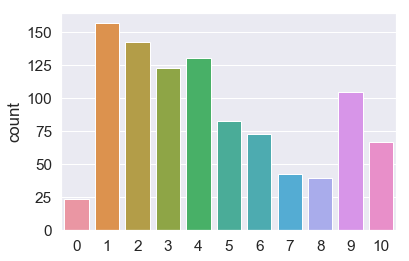

In [138]:
import seaborn as sns

# show the class distribution
# EXTRA BONUS POINT Opportunity: how to also show the class names here?
%matplotlib inline 
sns.countplot(data=dataset, x='target');

In [107]:
clf = Pipeline([
    ('vec', CountVectorizer(analyzer="word")),
    ('clf', SVC()), # DO NOT CHANGE THIS CLASSIFIER!
])

# Fit the pipeline on the training set
clf.fit(x_train, y_train)

# Predict the outcome on the testing set
y_predicted = clf.predict(x_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de détection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)

print()

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

              precision    recall  f1-score   support

          ar       0.00      0.00      0.00         4
          de       0.25      1.00      0.40        37
          en       1.00      0.58      0.73        31
          es       1.00      0.14      0.25        21
          fr       0.42      0.48      0.45        23
          it       0.00      0.00      0.00        18
          ja       0.00      0.00      0.00        13
          nl       0.00      0.00      0.00         9
          pl       0.00      0.00      0.00        10
          pt       1.00      0.05      0.09        22
          ru       0.00      0.00      0.00        10

   micro avg       0.35      0.35      0.35       198
   macro avg       0.33      0.20      0.17       198
weighted avg       0.47      0.35      0.28       198

[[ 0  4  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0  0]
 [ 0 13 18  0  0  0  0  0  0  0  0]
 [ 0  9  0  3  9  0  0  0  0  0  0]
 [ 0 12  0  0 11  0  0  0  0  0  0]
 [ 0 18

More data:
* Wikipedia
* http://www.cs.cmu.edu/~ralf/langid.html
* https://wortschatz.uni-leipzig.de/en/download

<div class="task_description">
    <i class="task">Homework 7.2:</i>
        :::1 Extra-Klausurbonuspunkt :::</div>
                                
Ein Extra-Klausurbonuspunkt wird an die fünf bestplazierten Teams vergeben.
Die Endergebnisse werden in der Vorlesung sowie in einer Liste auf Moodle präsentiert.

*An additional exam bonus point is awarded to the five best placed teams. The final results will be presented in the lecture and in a list on Moodle.*